In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, norm
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from scipy.stats import rankdata

In [2]:
df2 = pd.read_csv('source/FReDA2.csv')

In [3]:
df2['Anchor Age group'].value_counts()

Anchor Age group
3.0    2909
4.0    1935
2.0    1634
5.0     207
1.0     114
Name: count, dtype: int64

In [4]:
def clean_touch_values(series):
    return np.where(
        (series > 0) & (series < 1), 1,
        np.where((series < 0) & (series > -1), -1, np.round(series))
    )


col_names = [
    'Anchor Frequency of Touch',
    'Partner Frequency of Touch',
    'Anchor Wish for Touch',
    'Partner Wish for Touch'
]

for col in col_names:
    df2[col] = clean_touch_values(df2[col])

In [5]:
def compute_discrepancy(target, anchor_col, partner_col, new_col):
    diff = target[anchor_col] - target[partner_col]
    target[new_col] = np.select(
        condlist=[
            diff == 0,
            diff > 2,
            diff > 0,
            diff < -2,
            diff < 0
        ],
        choicelist=[0, 2, 1, -2, -1],
        default=np.nan
    )


compute_discrepancy(df2, 'Anchor Frequency of Touch', 'Partner Frequency of Touch', 'Frequency Discrepancy')
compute_discrepancy(df2, 'Anchor Wish for Touch', 'Partner Wish for Touch', 'Wish Discrepancy')
compute_discrepancy(df2, 'Anchor Kiss Frequency', 'Partner Kiss Frequency', 'Kiss Discrepancy')
compute_discrepancy(df2, 'Anchor Hold Frequency', 'Partner Hold Frequency', 'Hold Discrepancy')
compute_discrepancy(df2, 'Anchor Hug Frequency', 'Partner Hug Frequency', 'Hug Discrepancy')

In [11]:
lss = ['-', '-']
pal = ['#747474', '#282828']
## Grey => #747474 == Anchor
## Black => #282828 == Partner

In [14]:
def val_to_category(val):
    if val < 0.5:
        return 0
    elif val < 2:
        return 1
    elif val < 3:
        return 2
    elif val < 4:
        return 3
    elif val < 5:
        return 4
    else:
        return 5


df2['Anchor FreqCat'] = df2['Anchor Frequency of Touch'].apply(val_to_category)
df2['Anchor WishCat'] = df2['Anchor Wish for Touch'].apply(val_to_category)
df2['Partner FreqCat'] = df2['Partner Frequency of Touch'].apply(val_to_category)
df2['Partner WishCat'] = df2['Partner Wish for Touch'].apply(val_to_category)
df2['Couple FreqCat'] = df2['Couple Frequency of Touch'].apply(val_to_category)
df2['Couple WishCat'] = df2['Couple Wish for Touch'].apply(val_to_category)

df_melted = df2.melt(
    value_vars=['Couple FreqCat', 'Couple WishCat'],
    var_name='Touch Type',
    value_name='Frequency'
)
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette=pal, fill=False, linewidth=2)
handles = p.legend_.legend_handles[::-1]

for line, ls, handle in zip(p.lines, lss, handles):
    line.set_linestyle(ls)
    handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/couple.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.show()
# plt.close()

# Difference by sex in Frequency of Touch?
contingency = pd.crosstab(df2['Couple FreqCat'], df2['Couple WishCat'])
res = chi2_contingency(contingency)
print("--- Couple Frequency of Touch ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

--- Couple Frequency of Touch ---
Dof:25, Chi-square: 11940.916191664277, p-value: 0.0


In [15]:
lss = ['-', '-', '--', '--']
pal = ['#747474', '#282828', '#747474', '#282828']

In [16]:
df_melted = df2.melt(
    value_vars=['Anchor Kiss Frequency', 'Anchor Kiss Wish', 'Partner Kiss Frequency', 'Partner Kiss Wish'],
    var_name='Touch Type',
    value_name='Frequency'
)
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette=pal, fill=False, linewidth=2)
# handles = p.legend_.legend_handles[::-1]
#
# for line, ls, handle in zip(p.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# p.set_ylim([0, 0.16])
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/couple_kiss.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()
plt.close()

In [17]:
df_melted = df2.melt(
    value_vars=['Anchor Hold Frequency', 'Anchor Hold Wish', 'Partner Hold Frequency', 'Partner Hold Wish'],
    var_name='Touch Type',
    value_name='Frequency'
)
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette=pal, fill=False, linewidth=2)
# handles = p.legend_.legend_handles[::-1]
#
# for line, ls, handle in zip(p.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# p.set_ylim([0, 0.16])
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/couple_hold.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()
plt.close()

In [18]:
df_melted = df2.melt(
    value_vars=['Anchor Hug Frequency', 'Anchor Hug Wish', 'Partner Hug Frequency', 'Partner Hug Wish'],
    var_name='Touch Type',
    value_name='Frequency'
)
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette=pal, fill=False, linewidth=2)
# handles = p.legend_.legend_handles[::-1]
#
# for line, ls, handle in zip(p.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# p.set_ylim([0, 0.16])
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/couple_hug.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()
plt.close()

In [59]:
# df_melted = df2.melt(
#     value_vars=['Partner Kiss Frequency', 'Partner Kiss Wish'],
#     var_name='Touch Type',
#     value_name='Frequency'
# )
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette= 'gray', fill=False, linewidth=3)
# handles = p.legend_.legend_handles[::-1]
#
# for line, ls, handle in zip(p.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# p.set_ylim([0,0.315])
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/partner_kiss.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.show()
# plt.close()
#
# df_melted = df2.melt(
#     value_vars=['Partner Hold Frequency', 'Partner Hold Wish'],
#     var_name='Touch Type',
#     value_name='Frequency'
# )
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette= 'gray', fill=False, linewidth=3)
# handles = p.legend_.legend_handles[::-1]
#
# for line, ls, handle in zip(p.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# p.set_ylim([0,0.315])
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/partner_hold.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.show()
# plt.close()
#
# df_melted = df2.melt(
#     value_vars=['Partner Hug Frequency', 'Partner Hug Wish'],
#     var_name='Touch Type',
#     value_name='Frequency'
# )
# p = sns.kdeplot(data=df_melted, x='Frequency', hue='Touch Type', palette= 'gray', fill=False, linewidth=3)
# handles = p.legend_.legend_handles[::-1]
#
# for line, ls, handle in zip(p.lines, lss, handles):
#     line.set_linestyle(ls)
#     handle.set_ls(ls)
#
# plt.grid(False)
# p.set_xlabel('')
# p.set_ylim([0,0.315])
# plt.legend([], [], frameon=False)
# p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
# plt.savefig('output/img_bg/frequency/partner_hug.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.show()
# plt.close()

In [62]:
male_scores = df2.loc[df2['Anchor Sex'] == 0, 'Anchor Frequency of Touch']
female_scores = df2.loc[df2['Anchor Sex'] == 1, 'Anchor Frequency of Touch']

# Mann-Whitney U test (two-sided)
u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
# Rank-biserial correlation effect size
n1 = len(male_scores)
n2 = len(female_scores)
r_rb = 1 - (2 * u_stat) / (n1 * n2)
print("--------------------------Anchor Frequency of Touch-----------------------------------------------")
print(f"Mann-Whitney U = {u_stat}, p = {p_value}, rank-biserial r = {r_rb:.3f}")
all_scores = np.concatenate([male_scores, female_scores])
ranks = rankdata(all_scores)

male_ranks = ranks[:len(male_scores)]
female_ranks = ranks[len(male_scores):]
print(f"Mean rank male: {male_ranks.mean()}, mean rank female: {female_ranks.mean()}")

male_scores = df2.loc[df2['Anchor Sex'] == 0, 'Anchor Wish for Touch']
female_scores = df2.loc[df2['Anchor Sex'] == 1, 'Anchor Wish for Touch']

# Mann-Whitney U test (two-sided)
u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
# Rank-biserial correlation effect size
n1 = len(male_scores)
n2 = len(female_scores)
r_rb = 1 - (2 * u_stat) / (n1 * n2)
print("--------------------------Anchor Wish for Touch-----------------------------------------------")
print(f"Mann-Whitney U = {u_stat}, p = {p_value}, rank-biserial r = {r_rb:.3f}")
all_scores = np.concatenate([male_scores, female_scores])
ranks = rankdata(all_scores)

male_ranks = ranks[:len(male_scores)]
female_ranks = ranks[len(male_scores):]
print(f"Mean rank male: {male_ranks.mean()}, mean rank female: {female_ranks.mean()}")
print("-------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------")
male_scores = df2.loc[df2['Partner Sex'] == 0, 'Partner Frequency of Touch']
female_scores = df2.loc[df2['Partner Sex'] == 1, 'Partner Frequency of Touch']

# Mann-Whitney U test (two-sided)
u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
# Rank-biserial correlation effect size
n1 = len(male_scores)
n2 = len(female_scores)
r_rb = 1 - (2 * u_stat) / (n1 * n2)
print("--------------------------Partner Frequency of Touch-----------------------------------------------")
print(f"Mann-Whitney U = {u_stat}, p = {p_value}, rank-biserial r = {r_rb:.3f}")
all_scores = np.concatenate([male_scores, female_scores])
ranks = rankdata(all_scores)

male_ranks = ranks[:len(male_scores)]
female_ranks = ranks[len(male_scores):]
print(f"Mean rank male: {male_ranks.mean()}, mean rank female: {female_ranks.mean()}")

male_scores = df2.loc[df2['Partner Sex'] == 0, 'Partner Wish for Touch']
female_scores = df2.loc[df2['Partner Sex'] == 1, 'Partner Wish for Touch']

# Mann-Whitney U test (two-sided)
u_stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
# Rank-biserial correlation effect size
n1 = len(male_scores)
n2 = len(female_scores)
r_rb = 1 - (2 * u_stat) / (n1 * n2)
print("--------------------------Partner Wish for Touch-----------------------------------------------")
print(f"Mann-Whitney U = {u_stat}, p = {p_value}, rank-biserial r = {r_rb:.3f}")
all_scores = np.concatenate([male_scores, female_scores])
ranks = rankdata(all_scores)

male_ranks = ranks[:len(male_scores)]
female_ranks = ranks[len(male_scores):]
print(f"Mean rank male: {male_ranks.mean()}, mean rank female: {female_ranks.mean()}")


--------------------------Anchor Frequency of Touch-----------------------------------------------
Mann-Whitney U = 5640873.5, p = 0.14378423062687787, rank-biserial r = 0.020
Mean rank male: 3361.0527205656317, mean rank female: 3429.082650466233
--------------------------Anchor Wish for Touch-----------------------------------------------
Mann-Whitney U = 5517983.0, p = 0.0024090216427794333, rank-biserial r = 0.041
Mean rank male: 3323.275130648632, mean rank female: 3463.8072901949704
-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
--------------------------Partner Frequency of Touch-----------------------------------------------
Mann-Whitney U = 5707864.5, p = 0.6392220323937015, rank-biserial r = 0.006
Mean rank male: 3382.0132139812445, mean rank female: 3403.8026033690658
--------------------------Partner Wish for Touch-------------

In [13]:
def calculate_freq(input_var):
    n = df2[input_var].count()
    m = [
        np.sum(df2[input_var] < 1),
        np.sum((df2[input_var] >= 1) & (df2[input_var] < 2)),
        np.sum((df2[input_var] >= 2) & (df2[input_var] < 3)),
        np.sum((df2[input_var] >= 3) & (df2[input_var] < 4)),
        np.sum((df2[input_var] >= 4) & (df2[input_var] < 5)),
        np.sum(df2[input_var] >= 5)
    ]
    temp_df = pd.DataFrame({
        input_var: [round((m[0] * 100) / n, 2),
                    round((m[1] * 100) / n, 2),
                    round((m[2] * 100) / n, 2),
                    round((m[3] * 100) / n, 2),
                    round((m[4] * 100) / n, 2),
                    round((m[5] * 100) / n, 2)]
    },
        index=["Not at all",
               "1 to 5",
               "6 to 10",
               "11 to 20",
               "21 to 50",
               "> 50"])

    return temp_df


var_names = ['Anchor Frequency of Touch',
             'Anchor Wish for Touch',
             'Partner Frequency of Touch',
             'Partner Wish for Touch',
             'Anchor Kiss Frequency',
             'Anchor Kiss Wish',
             'Partner Kiss Frequency',
             'Partner Kiss Wish',
             'Anchor Hold Frequency',
             'Anchor Hold Wish',
             'Partner Hold Frequency',
             'Partner Hold Wish',
             'Anchor Hug Frequency',
             'Anchor Hug Wish',
             'Partner Hug Frequency',
             'Partner Hug Wish',
             ]

labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]

frequency_map = pd.DataFrame({}, index=labels)

for i, label in enumerate(var_names):
    a = calculate_freq(label)
    frequency_map = pd.concat([frequency_map, a], axis=1)

In [14]:
pd.crosstab(df2['Anchor Frequency of Touch'], df2['Partner Frequency of Touch'])

Partner Frequency of Touch,0.0,1.0,2.0,3.0,4.0,5.0
Anchor Frequency of Touch,,,,,,
0.0,38,38,18,16,9,7
1.0,38,652,334,164,87,15
2.0,9,400,506,404,200,46
3.0,11,208,450,530,392,114
4.0,6,97,227,431,487,191
5.0,1,20,45,128,236,244


In [15]:
contingency = pd.crosstab(df2['Anchor Frequency of Touch'], df2['Partner Frequency of Touch'])
res = chi2_contingency(contingency)
print("--- Overall Frequency of Touch ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

contingency = pd.crosstab(df2['Anchor Wish for Touch'], df2['Partner Wish for Touch'])
res = chi2_contingency(contingency)
print("--- Overall Wish for Touch ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

print("-------------------------------------------------------------------------")

contingency = pd.crosstab(df2['Anchor Kiss Frequency'], df2['Partner Kiss Frequency'])
res = chi2_contingency(contingency)
print("--- Kiss Frequency ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

contingency = pd.crosstab(df2['Anchor Hold Frequency'], df2['Partner Hold Frequency'])
res = chi2_contingency(contingency)
print("--- Hold Frequency ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

contingency = pd.crosstab(df2['Anchor Hug Frequency'], df2['Partner Hug Frequency'])
res = chi2_contingency(contingency)
print("--- Kiss Frequency ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

print("-------------------------------------------------------------------------")

contingency = pd.crosstab(df2['Anchor Kiss Wish'], df2['Partner Kiss Wish'])
res = chi2_contingency(contingency)
print("--- Kiss Wish ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

contingency = pd.crosstab(df2['Anchor Hold Wish'], df2['Partner Hold Wish'])
res = chi2_contingency(contingency)
print("--- Hold Wish ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

contingency = pd.crosstab(df2['Anchor Hug Wish'], df2['Partner Hug Wish'])
res = chi2_contingency(contingency)
print("--- Kiss Wish ---")
print(f"Dof:{res.dof}, Chi-square: {res.statistic}, p-value: {res.pvalue}")

--- Overall Frequency of Touch ---
Dof:25, Chi-square: 3041.2066862172405, p-value: 0.0
--- Overall Wish for Touch ---
Dof:25, Chi-square: 1206.0746966889383, p-value: 8.918456992805848e-239
-------------------------------------------------------------------------
--- Kiss Frequency ---
Dof:25, Chi-square: 3298.046255842379, p-value: 0.0
--- Hold Frequency ---
Dof:25, Chi-square: 1496.6869299552707, p-value: 8.340970143217895e-301
--- Kiss Frequency ---
Dof:25, Chi-square: 2216.857150365294, p-value: 0.0
-------------------------------------------------------------------------
--- Kiss Wish ---
Dof:25, Chi-square: 1299.2662056681245, p-value: 1.2165578522795317e-258
--- Hold Wish ---
Dof:25, Chi-square: 767.382496390879, p-value: 9.073107626992727e-146
--- Kiss Wish ---
Dof:25, Chi-square: 1093.8437768850338, p-value: 6.822929796111441e-215


In [16]:
# cols = frequency_map.columns.tolist()
#
# lines_w = 3
#
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# axes = axes.flatten()  # flatten to index as 0,1,2,3 instead of [row, col]
#
# for i, name in enumerate(cols):
#     ax = axes[i]
#
#     sns.barplot(
#         x=frequency_map[name].index,
#         y=frequency_map[name].values,
#         ax=ax,
#         linewidth=lines_w,
#         edgecolor='k',
#         facecolor=(0, 0, 0, 0)
#     )
#     multiplier = 0
#     for attribute, measurement in frequency_map[cols[i]].items():
#         offset = multiplier
#         rects = ax.bar(offset,
#                        measurement,
#                        label=attribute,
#                        edgecolor='k',
#                        facecolor=(0, 0, 0, 0)
#                        )
#         ax.bar_label(rects)
#         multiplier += 1
#     if i % 2 == 1:
#         for bar in ax.patches:
#             bar.set_linestyle('--')
#             bar.set_linewidth(lines_w)
#     elif i % 2 == 0:
#         for bar in ax.patches:
#             bar.set_linestyle('-')
#             bar.set_linewidth(lines_w)
#
#     ax.set_title(name)
#     ax.set_ylim(0, 35)
#
# plt.tight_layout()
# plt.show()

# plt.savefig('output/img_bg/frequency/' + name + '.png', dpi=350, transparent=False, bbox_inches='tight')

In [17]:
desired_order = {5: 'More than 50 times',
                 4: '21 to 50 times',
                 3: '11 to 20 times',
                 2: '6 to 10 times',
                 1: '1 to 5 times',
                 0: "Not at all"}

colors = ["#1d91c0", "#41b6c4", "#7fcdbb", "#a1dab4", "#ffffd9", "#253494"]
reversed_colors = colors[::-1]

In [18]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Frequency Discrepancy'], df2['Anchor Frequency of Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)

ax.legend(title='Frequency of Touch', bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=12)

a = df2.value_counts("Frequency Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels, rotation=0)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)
# plt.show()
# plt.savefig('output/img_bg/comparisons/anchor_frequency_of_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.close()

In [19]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Frequency Discrepancy'], df2['Partner Frequency of Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Frequency of Touch', bbox_to_anchor=(1, 1.02), loc='upper left')

a = df2.value_counts("Frequency Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)
# plt.show()
# plt.savefig('output/img_bg/comparisons/partner_frequency_of_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.close()

In [20]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Wish Discrepancy'], df2['Anchor Wish for Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Wish for Touch', bbox_to_anchor=(1, 1.02), loc='upper left')
#
a = df2.value_counts("Wish Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)
# plt.show()
# plt.savefig('output/img_bg/comparisons/anchor_wish_for_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.close()

In [21]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Wish Discrepancy'], df2['Partner Wish for Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Wish for Touch', bbox_to_anchor=(1, 1.02), loc='upper left')

a = df2.value_counts("Wish Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)
# plt.show()
# plt.savefig('output/img_bg/comparisons/partner_wish_for_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.close()

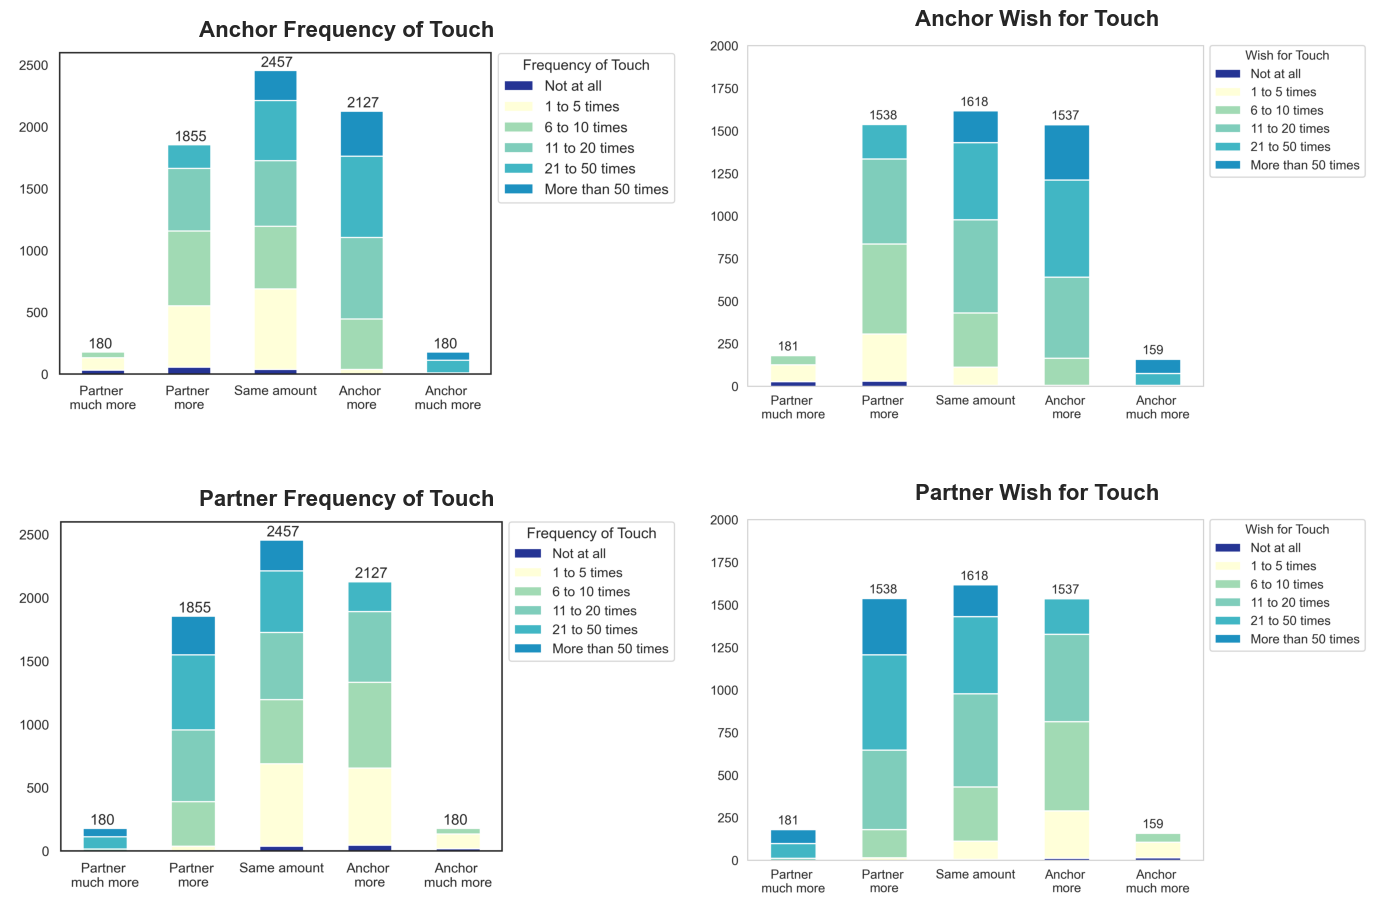

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0][0].imshow(plt.imread("output/img_bg/comparisons/anchor_frequency_of_touch.png"))
axes[0][0].axis("off")
axes[0][0].set_title("Anchor Frequency of Touch", fontsize=16, fontweight="bold")
axes[0][1].imshow(plt.imread("output/img_bg/comparisons/anchor_wish_for_touch.png"))
axes[0][1].axis("off")
axes[0][1].set_title("Anchor Wish for Touch", fontsize=16, fontweight="bold")
axes[1][0].imshow(plt.imread("output/img_bg/comparisons/partner_frequency_of_touch.png"))
axes[1][0].axis("off")
axes[1][0].set_title("Partner Frequency of Touch", fontsize=16, fontweight="bold")
axes[1][1].imshow(plt.imread("output/img_bg/comparisons/partner_wish_for_touch.png"))
axes[1][1].axis("off")
axes[1][1].set_title("Partner Wish for Touch", fontsize=16, fontweight="bold")
plt.tight_layout()
# plt.subplots_adjust(wspace=-0.2, hspace=0.1)
# plt.show()

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
temp1 = 'Anchor Perception of Touch'
temp2 = 'Partner Perception of Touch'

kde_configs = [
    {
        "source": temp1,
        "x": "Anchor Frequency of Touch",
        "palette": sns.cubehelix_palette(10, rot=-.25, light=.7),
        "outfile": "output/img_bg/kde/anchor_perception_freq.png",
    },
    {
        "source": temp1,
        "x": "Anchor Wish for Touch",
        "palette": sns.cubehelix_palette(10, start=0.0, rot=0.3, light=0.85, dark=0.1, gamma=1.0),
        "outfile": "output/img_bg/kde/anchor_perception_wish.png",
    },
    {
        "source": temp2,
        "x": "Partner Frequency of Touch",
        "palette": sns.cubehelix_palette(10, rot=-.25, light=.7),
        "outfile": "output/img_bg/kde/partner_perception_freq.png",
    },
    {
        "source": temp2,
        "x": "Partner Wish for Touch",
        "palette": sns.cubehelix_palette(10, start=0.0, rot=0.3, light=0.85, dark=0.1, gamma=1.0),
        "outfile": "output/img_bg/kde/partner_perception_wish.png",
    },
]

for config in kde_configs:
    source = config["source"]
    x_var = config["x"]
    palette = config["palette"]
    outfile = config["outfile"]

    g = sns.FacetGrid(
        data=df2,
        row=source,
        hue=source,
        aspect=4,
        height=2,
        palette=palette
    )

    g.map(sns.kdeplot,
          x_var,
          bw_adjust=0.5,
          clip_on=False,
          fill=True,
          alpha=1,
          linewidth=1.5)

    g.map(sns.kdeplot,
          x_var,
          color="k",
          clip_on=False,
          lw=2,
          bw_adjust=0.5)

    g.refline(y=0, linewidth=2, linestyle="-", color="k", clip_on=False)


    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, .1, label, fontweight="bold", color="b",
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, temp1)
    g.figure.subplots_adjust(hspace=-.5)

    g.set_titles("")
    g.set_xlabels("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    plt.xticks(
        ticks=[0, 1, 2, 3, 4, 5],
        labels=[
            "Not at all",
            '1 to 5 times',
            '6 to 10 times',
            '11 to 20 times',
            '21 to 50 times',
            'More than 50 times',
        ],
        rotation=15
    )

    plt.title("")

    # plt.savefig(outfile, dpi=350, transparent=False, bbox_inches='tight')
    plt.close()

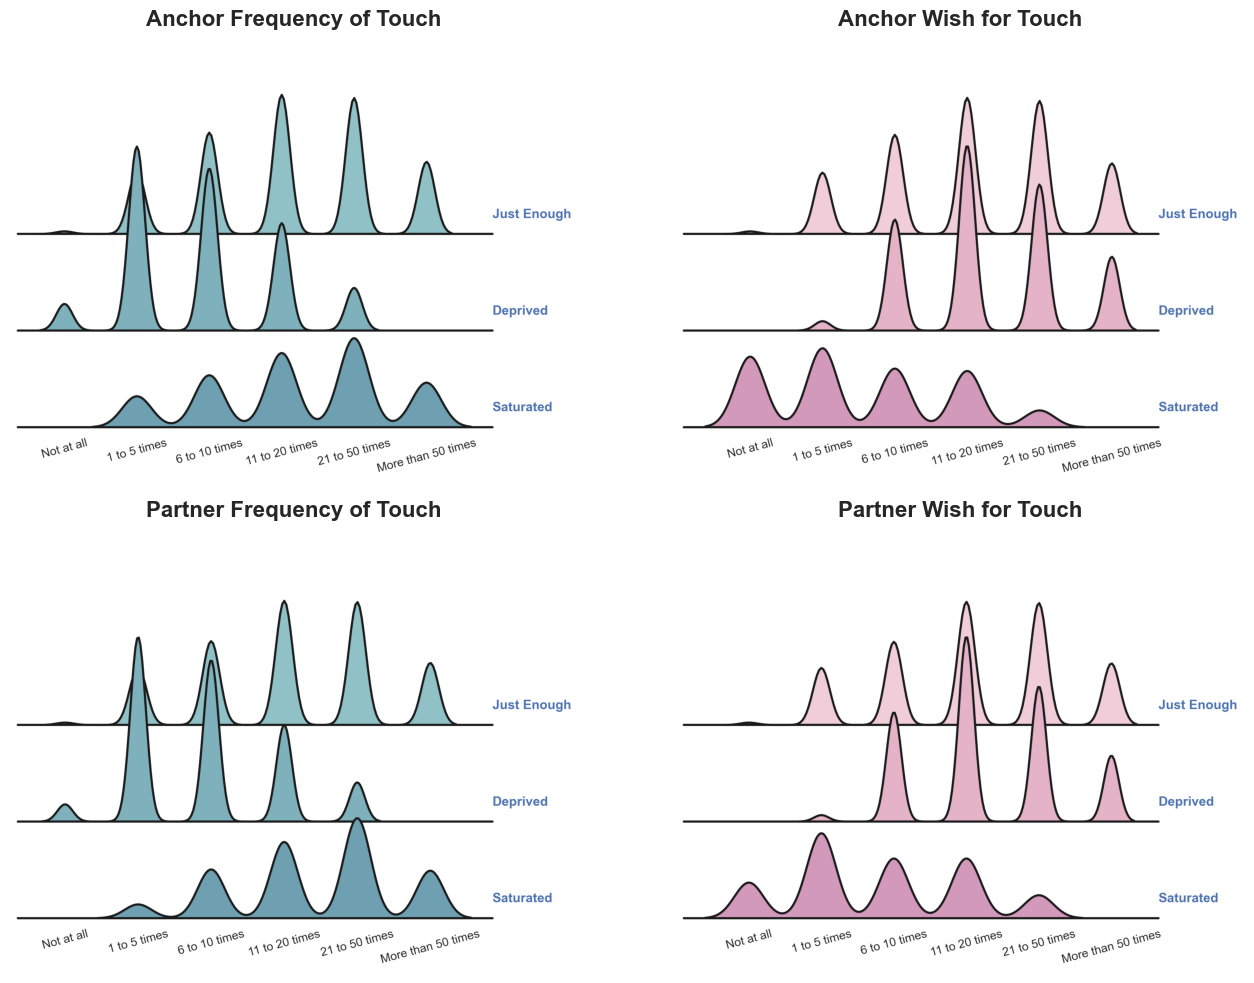

In [24]:
# Load and combine using matplotlib (or use external tools like Illustrator)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0][0].imshow(plt.imread("output/img_bg/kde/anchor_perception_freq.png"))
axes[0][0].axis("off")
axes[0][0].set_title("Anchor Frequency of Touch", fontsize=16, fontweight="bold")
axes[0][1].imshow(plt.imread("output/img_bg/kde/anchor_perception_wish.png"))
axes[0][1].axis("off")
axes[0][1].set_title("Anchor Wish for Touch", fontsize=16, fontweight="bold")
axes[1][0].imshow(plt.imread("output/img_bg/kde/partner_perception_freq.png"))
axes[1][0].axis("off")
axes[1][0].set_title("Partner Frequency of Touch", fontsize=16, fontweight="bold")
axes[1][1].imshow(plt.imread("output/img_bg/kde/partner_perception_wish.png"))
axes[1][1].axis("off")
axes[1][1].set_title("Partner Wish for Touch", fontsize=16, fontweight="bold")
plt.tight_layout()
# plt.subplots_adjust(wspace=-0.2, hspace=0.1)
plt.show()

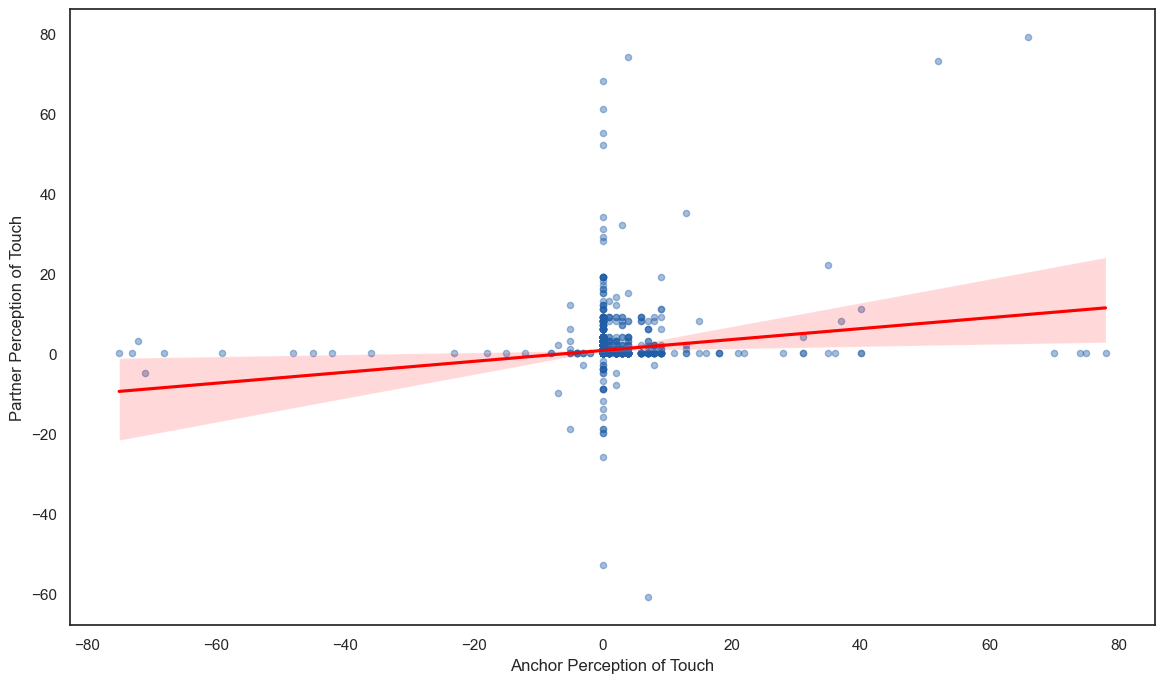

In [25]:
def map_to_random_value(response):
    if response == 0:
        return 0
    elif response == 1:
        return np.random.randint(1, 5)
    elif response == 2:
        return np.random.randint(6, 10)
    elif response == 3:
        return np.random.randint(11, 20)
    elif response == 4:
        return np.random.randint(21, 50)
    elif response == 5:
        return np.random.randint(51, 80)
    elif response == -1:
        return np.random.randint(-5, -1)
    elif response == -2:
        return np.random.randint(-10, -6)
    elif response == -3:
        return np.random.randint(-20, -11)
    elif response == -4:
        return np.random.randint(-50, -21)
    elif response == -5:
        return np.random.randint(-80, -51)
    else:
        return np.nan


df2["x_value"] = df2["Anchor Difference of Touch"].apply(map_to_random_value)
df2["y_value"] = df2["Partner Difference of Touch"].apply(map_to_random_value)

plt.figure(figsize=(14, 8))
plt.tight_layout()
sns.regplot(data=df2, x="x_value", y="y_value",
            scatter_kws={'alpha': 0.4, 's': 20, 'color': "#225ea8"},
            line_kws={'color': 'red'},
            order=1,
            # x_jitter=0.1
            )

plt.xlabel("Anchor Perception of Touch")
plt.ylabel("Partner Perception of Touch")

plt.grid(False)
# plt.savefig('output/img_bg/scatter/scatter_anchor_partner.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

----- AGE -----

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.0_Couple Frequency of Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.104e-13 U_stat=1.135e+06
1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.179e-02 U_stat=5.569e+03
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.333e-55 U_stat=3.232e+06
4.0_Couple Frequency of Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.038e-38 U_stat=1.422e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.632e-04 U_stat=1.733e+04
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.478e-13 U_stat=1.756e+04
1.0_Couple Wish for Touch vs. 5.0_Couple Wish f

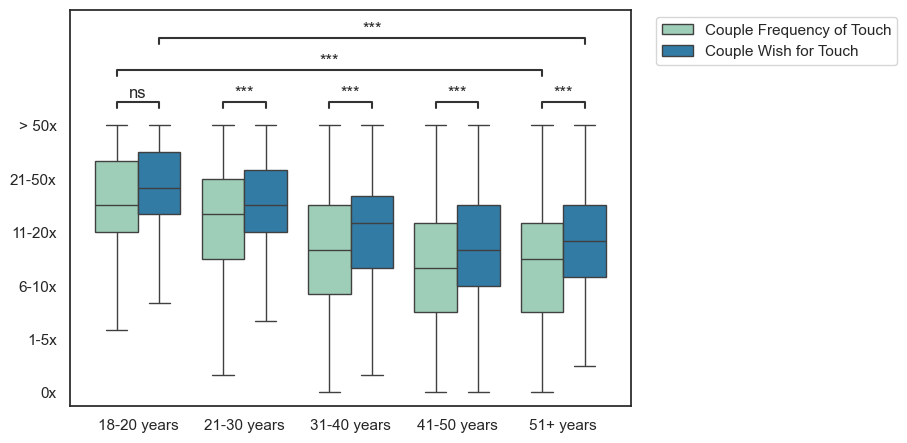

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.0_Couple Frequency of Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.414e-12 U_stat=1.025e+06
1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.141e-02 U_stat=7.434e+03
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.051e-52 U_stat=3.237e+06
4.0_Couple Frequency of Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.874e-38 U_stat=1.022e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.739e-09 U_stat=1.250e+05
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.430e-17 U_stat=5.386e+04
1.0_Couple Wish for Touch vs. 5.0_Couple Wish f

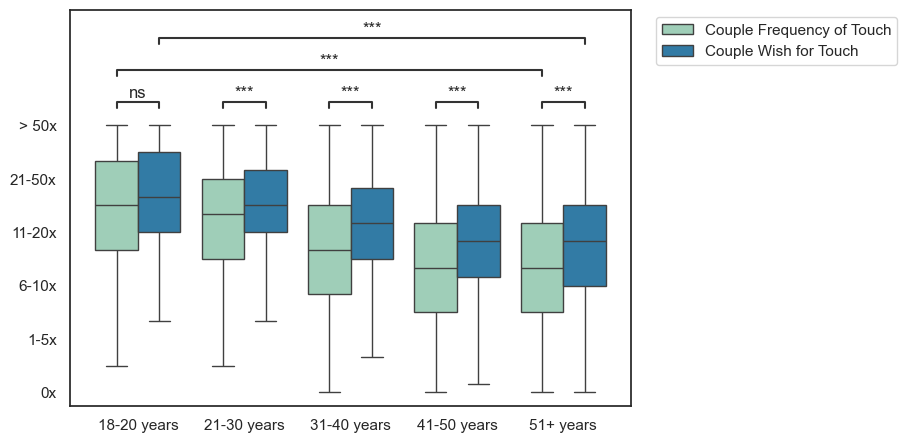

In [7]:
sns.set_theme(style="white")

df_melted = df2.melt(id_vars='Anchor Age group',
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars='Partner Age group',
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (2, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((4, "Couple Frequency of Touch"), (4, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),
]

x = "Anchor Age group"
x2 = "Partner Age group"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
# plt.savefig('output/img_bg/comparisons/anchor-age.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = x2
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
# plt.savefig('output/img_bg/comparisons/partner-age.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [27]:
target1 = 'Anchor Age group'
target2 = 'Partner Age group'

pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((2, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((3, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((4, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((4, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
]

results1 = []
results2 = []

for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })
effect_sizes_df1 = pd.DataFrame(results1)

for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

----- WORK STATUS -----

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.967e-29 U_stat=7.298e+05
0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:5.553e-20 U_stat=1.905e+05
2.0_Couple Frequency of Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.131e-52 U_stat=8.682e+06
0.0_Couple Frequency of Touch vs. 2.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.110e-11 U_stat=1.418e+06
0.0_Couple Wish for Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.583e-05 U_stat=1.521e+06


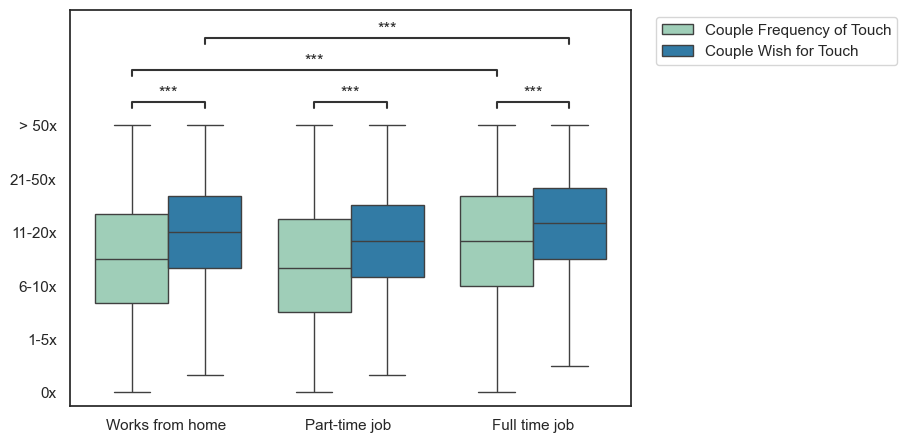

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.584e-30 U_stat=5.375e+05
0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.322e-19 U_stat=1.932e+05
2.0_Couple Frequency of Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.093e-53 U_stat=9.346e+06
0.0_Couple Frequency of Touch vs. 2.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.820e-10 U_stat=1.485e+06
0.0_Couple Wish for Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.299e-04 U_stat=1.587e+06


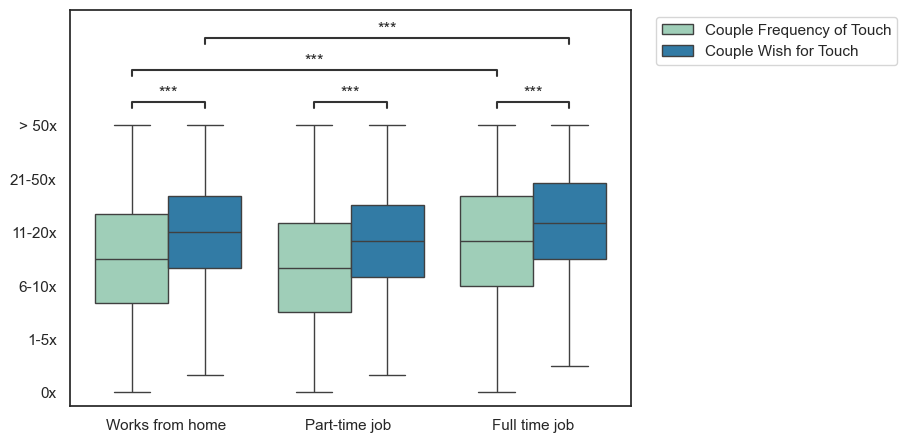

In [9]:
target1 = 'Anchor Work Status'
target2 = 'Partner Work Status'

df_melted = df2.melt(id_vars=target1,
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
pairs = [
    ((0, "Couple Frequency of Touch"), (2, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (2, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (2, "Couple Wish for Touch")),

]

y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted, x=target1, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=target1, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2], labels=["Works from home ", "Part-time job ", "Full time job"])

# plt.savefig('output/img_bg/comparisons/anchor-work.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted2, x=target2, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted2, x=target2, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2], labels=["Works from home ", "Part-time job ", "Full time job"])
# plt.savefig('output/img_bg/comparisons/partner-work.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [16]:
target1 = 'Anchor Work Status'
target2 = 'Partner Work Status'

pairs = [
    ((0, "Couple Frequency of Touch"), (2, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (2, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (2, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (2, "Couple Wish for Touch")),
]

results1 = []
results2 = []

for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })
effect_sizes_df1 = pd.DataFrame(results1)

for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

----- AGREEABLENESS -----

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.0_Couple Frequency of Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:5.587e-15 U_stat=1.758e+05
1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.308e-02 U_stat=4.040e+02
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.233e-49 U_stat=4.048e+06
4.0_Couple Frequency of Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.091e-34 U_stat=3.317e+06
1.0_Couple Frequency of Touch vs. 4.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.923e-05 U_stat=2.893e+04
1.0_Couple Wish for Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.853e-04 U_stat=3.102e+04


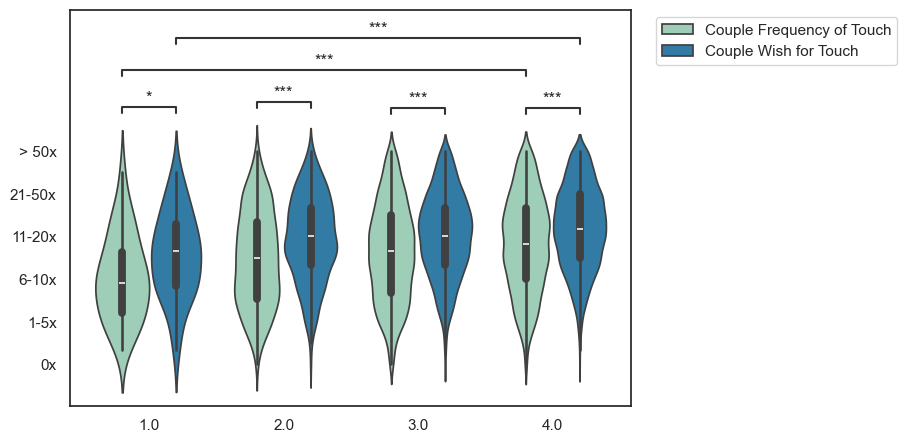

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.0_Couple Frequency of Touch vs. 2.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.677e-15 U_stat=2.133e+05
1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.048e-02 U_stat=7.610e+02
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.668e-52 U_stat=3.961e+06
4.0_Couple Frequency of Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.118e-32 U_stat=3.206e+06
1.0_Couple Frequency of Touch vs. 4.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.950e-06 U_stat=3.813e+04
1.0_Couple Wish for Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.896e-05 U_stat=4.080e+04


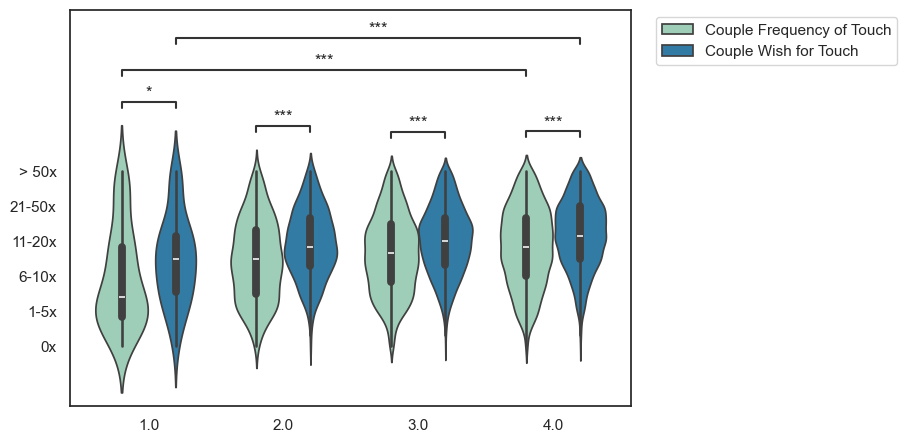

In [10]:
for i in range(0, len(df2)):
    if 2 < df2['Anchor Agreeableness'][i] <= 5:
        df2.loc[i, 'Anchor agg'] = 1
    elif 5 < df2['Anchor Agreeableness'][i] <= 8:
        df2.loc[i, 'Anchor agg'] = 2
    elif 8 < df2['Anchor Agreeableness'][i] <= 11:
        df2.loc[i, 'Anchor agg'] = 3
    elif 11 < df2['Anchor Agreeableness'][i]:
        df2.loc[i, 'Anchor agg'] = 4

for i in range(0, len(df2)):
    if 2 < df2['Partner Agreeableness'][i] <= 5:
        df2.loc[i, 'Partner agg'] = 1
    elif 5 < df2['Partner Agreeableness'][i] <= 8:
        df2.loc[i, 'Partner agg'] = 2
    elif 8 < df2['Partner Agreeableness'][i] <= 11:
        df2.loc[i, 'Partner agg'] = 3
    elif 11 < df2['Partner Agreeableness'][i]:
        df2.loc[i, 'Partner agg'] = 4

target1 = 'Anchor agg'
target2 = 'Partner agg'

df_melted = df2.melt(id_vars=target1,
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )
pairs = [
    ((1, "Couple Frequency of Touch"), (4, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (4, "Couple Wish for Touch")),
    # ((2, "Couple Frequency of Touch"), (4, "Couple Frequency of Touch")),
    # ((2, "Couple Wish for Touch"), (4, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (2, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((4, "Couple Frequency of Touch"), (4, "Couple Wish for Touch")),
]

y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.violinplot(data=df_melted, x=target1, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', )
annot = Annotator(ax, pairs, data=df_melted, x=target1, y=y, hue=hue, hue_order=hue_order, plot="violinplot")
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test().annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig('output/img_bg/comparisons/anchor-aggreableness.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.violinplot(data=df_melted2, x=target2, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu')
annot = Annotator(ax, pairs, data=df_melted2, x=target2, y=y, hue=hue, hue_order=hue_order, plot="violinplot")
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test().annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig('output/img_bg/comparisons/partner-aggreableness.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [31]:
target1 = 'Anchor agg'
target2 = 'Partner agg'

pairs = [
    ((1, "Couple Frequency of Touch"), (4, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (4, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (4, "Couple Frequency of Touch")),
    ((2, "Couple Wish for Touch"), (4, "Couple Wish for Touch")),
]
results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)

results2 = []

for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted2['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted2['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

----- LIFE SATISFACTION -----

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.029e-01 U_stat=1.600e+01
6.0_Couple Frequency of Touch vs. 6.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.903e-25 U_stat=4.096e+05
10.0_Couple Frequency of Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.154e-11 U_stat=9.208e+05
0.0_Couple Frequency of Touch vs. 10.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.279e-01 U_stat=4.580e+03
0.0_Couple Wish for Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.317e-01 U_stat=5.508e+03


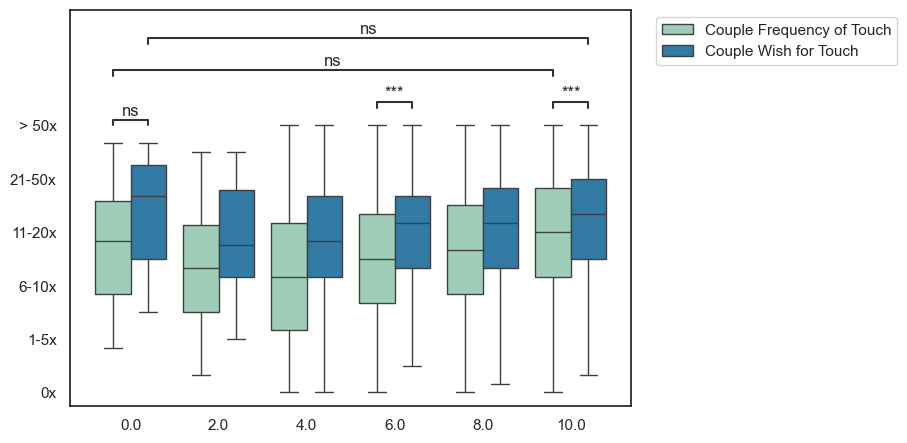

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.352e-02 U_stat=1.600e+01
6.0_Couple Frequency of Touch vs. 6.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.449e-27 U_stat=3.960e+05
10.0_Couple Frequency of Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.458e-10 U_stat=8.849e+05
0.0_Couple Frequency of Touch vs. 10.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.612e-05 U_stat=1.483e+03
0.0_Couple Wish for Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.918e-03 U_stat=2.949e+03


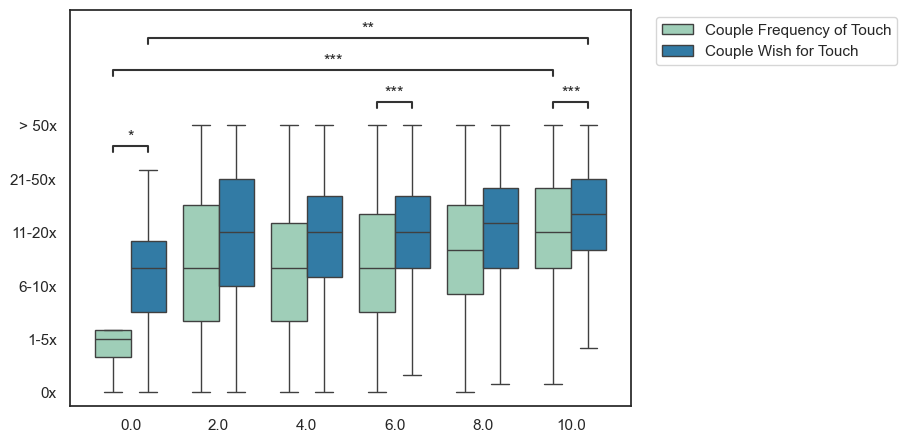

In [27]:
target1 = 'Anchor Life Satisfaction'
target2 = 'Partner Life Satisfaction'

df_melted = df2.melt(id_vars=target1,
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
pairs = [
    ((0, "Couple Frequency of Touch"), (10, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (10, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((6, "Couple Frequency of Touch"), (6, "Couple Wish for Touch")),
    ((10, "Couple Frequency of Touch"), (10, "Couple Wish for Touch")),
]

x = target1
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2], labels=["Works from home ", "Part-time job ", "Full time job"])
# plt.savefig('output/img_bg/comparisons/anchor-lifesat.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = target2
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)

annot = Annotator(ax, pairs, data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2], labels=["Works from home ", "Part-time job ", "Full time job"])
# plt.savefig('output/img_bg/comparisons/partner-lifesat.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [33]:
target1 = 'Anchor Life Satisfaction'
target2 = 'Partner Life Satisfaction'

pairs = [
    ((0, "Couple Frequency of Touch"), (10, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (10, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (6, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (6, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((6, "Couple Frequency of Touch"), (6, "Couple Wish for Touch")),
    ((10, "Couple Frequency of Touch"), (10, "Couple Wish for Touch")),

]

results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)][
        'Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)][
        'Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)

results2 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted2['Touch index'] == var1)][
        'Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted2['Touch index'] == var2)][
        'Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

----- HEALTH -----

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.176e-01 U_stat=1.205e+02
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.234e-34 U_stat=1.153e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.743e-13 U_stat=6.175e+05
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.272e-01 U_stat=8.590e+03
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.126e-01 U_stat=8.038e+03


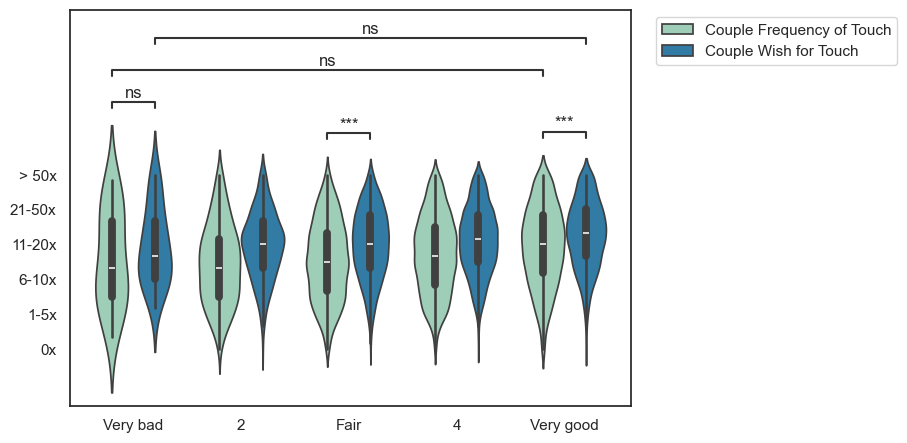

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.381e-02 U_stat=1.535e+02
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.553e-38 U_stat=1.338e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.349e-09 U_stat=5.075e+05
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.357e-03 U_stat=6.770e+03
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.388e-02 U_stat=8.142e+03


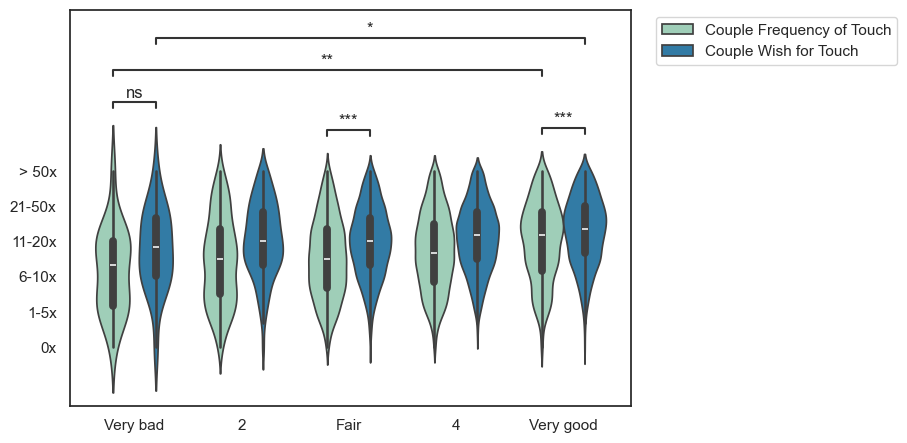

In [39]:
target1 = "Anchor Health"
target2 = "Partner Health"

df_melted = df2.melt(id_vars=target1,
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )

pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    # ((2, "Couple Frequency of Touch"), (2, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    # ((4, "Couple Frequency of Touch"), (4, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),

]

x = target1
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.violinplot(data=df_melted, x=target1, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu')
annot = Annotator(ax, pairs, data=df_melted, x=target1, y=y, hue=hue, hue_order=hue_order, plot="violinplot")

annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very bad", 2, "Fair", 4, "Very good"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig('output/img_bg/comparisons/anchor-health.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = target2
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.violinplot(data=df_melted2, x=target2, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu')
annot = Annotator(ax, pairs, data=df_melted2, x=target2, y=y, hue=hue, hue_order=hue_order, plot="violinplot")

annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.xlim(reversed(plt.xlim()))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very bad", 2, "Fair", 4, "Very good"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig('output/img_bg/comparisons/partner-health.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [40]:
target1 = "Anchor Health"
target2 = "Partner Health"

pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((3, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),
]

results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)

results2 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted2['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted2['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

----- LONELINESS -----

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.687e-29 U_stat=4.753e+06
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.353e-27 U_stat=3.173e+05
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.420e-06 U_stat=3.514e+03
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.995e-06 U_stat=2.262e+05
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.296e-01 U_stat=1.860e+05


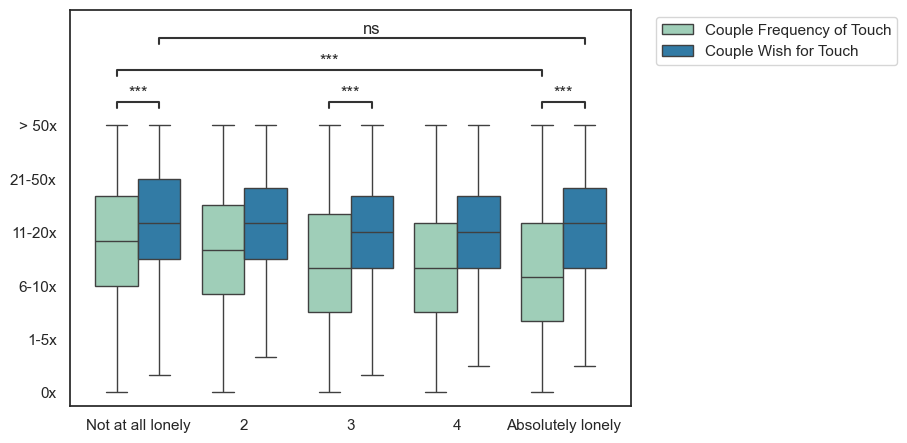

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.306e-26 U_stat=4.746e+06
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.115e-31 U_stat=3.253e+05
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.037e-05 U_stat=4.052e+03
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.764e-11 U_stat=2.535e+05
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.190e-06 U_stat=2.313e+05


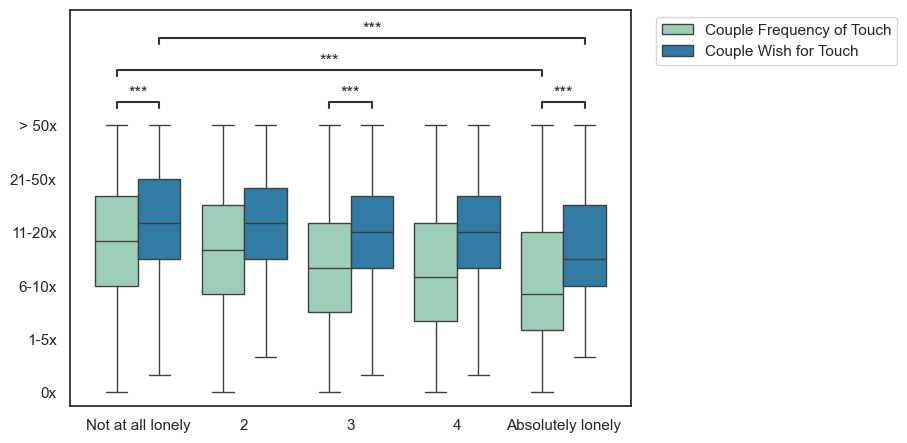

In [20]:
target1 = "Anchor Loneliness"
target2 = "Partner Loneliness"

df_melted = df2.melt(id_vars=target1,
                     value_vars=["Couple Frequency of Touch", "Couple Wish for Touch"],
                     var_name='Touch index', value_name='Touch Freq')

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),
]

x = target1
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.xlim(reversed(plt.xlim()))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.title("Touch by Loneliness")
# plt.savefig('output/img_bg/comparisons/anchor-loneliness.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = target2
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.boxplot(data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.xlim(reversed(plt.xlim()))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.title("Touch by Loneliness")
# plt.savefig('output/img_bg/comparisons/partner-loneliness.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [64]:
target1 = "Anchor Loneliness"
target2 = "Partner Loneliness"

pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((3, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),
]

results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)

results2 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted2['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted2['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.385e-04 U_stat=2.302e+05
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.159e-26 U_stat=1.180e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.861e-21 U_stat=3.516e+05
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.200e-89 U_stat=5.472e+05
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.566e-80 U_stat=5.358e+05


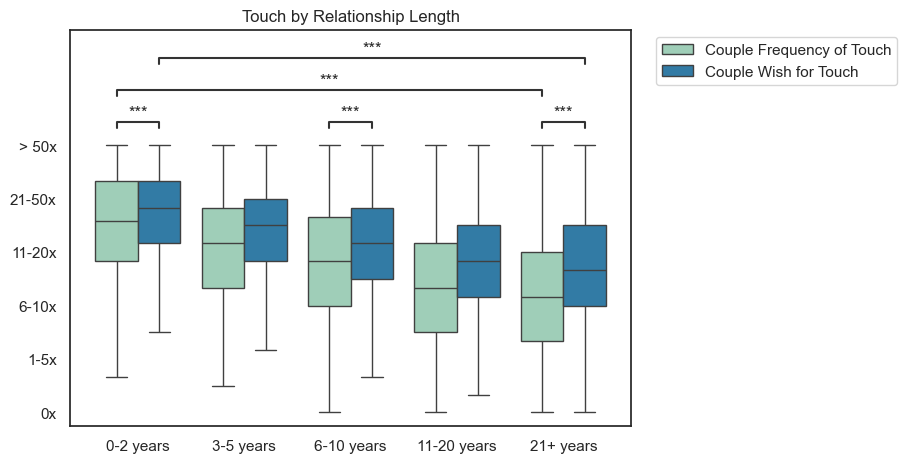

In [30]:
df_melted = df2.melt(id_vars='Relationship Length',
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch',
                                 ],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Relationship Length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.grid(False)
# plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.title("Touch by Relationship Length")
# plt.savefig("output/img_bg/comparisons/relationlength_freq.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [39]:
# Define the comparison pairs
pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((2, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((3, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((4, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((4, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),

    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (2, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((4, "Couple Frequency of Touch"), (4, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),

]

# Compute effect sizes (r) for each pair
results = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted['Relationship Length'] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted['Relationship Length'] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results.append({
        'Comparison': f"{var1} (Age {cat1}) vs {var2} (Age {cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results)
# print(effect_sizes_df)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.185e-05 U_stat=7.465e+02
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.354e-70 U_stat=2.857e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.139e-01 U_stat=3.997e+04
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.655e-23 U_stat=1.059e+03
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.145e-18 U_stat=1.862e+03


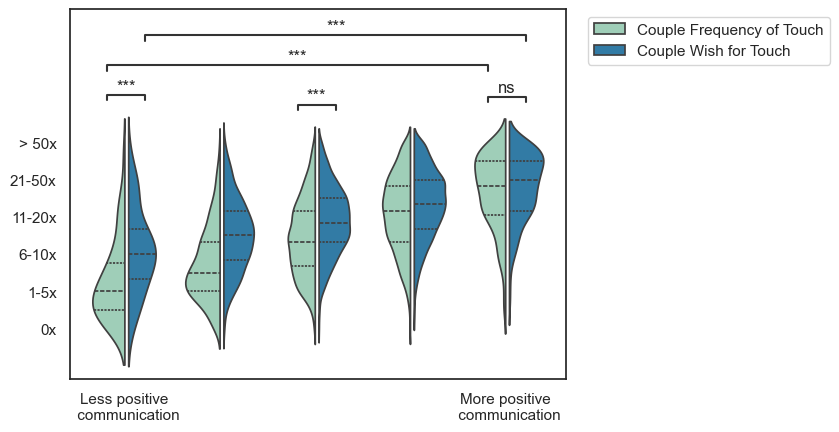

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:5.655e-06 U_stat=5.045e+02
3.0_Couple Frequency of Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.612e-62 U_stat=1.992e+06
5.0_Couple Frequency of Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.958e-02 U_stat=2.758e+04
1.0_Couple Frequency of Touch vs. 5.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.559e-22 U_stat=6.130e+02
1.0_Couple Wish for Touch vs. 5.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.944e-18 U_stat=1.124e+03


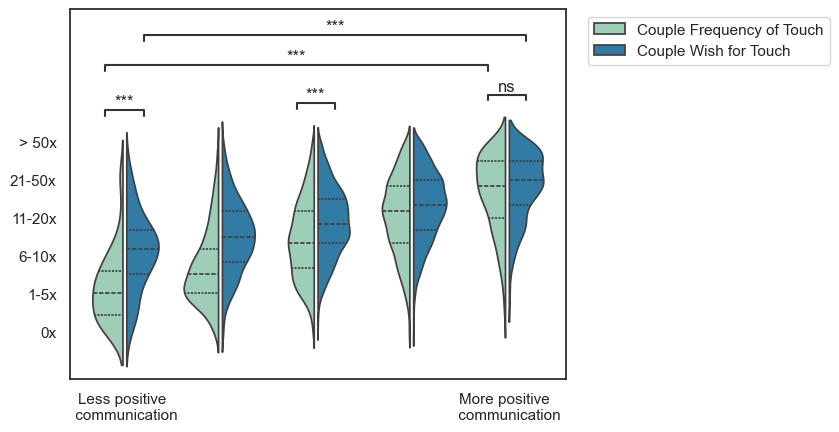

In [23]:
for i in range(0, len(df2)):
    if 7 < df2['Anchor Communication Quality'][i] <= 12:
        df2.loc[i, 'Anchor comm'] = 1
    elif 12 < df2['Anchor Communication Quality'][i] <= 17:
        df2.loc[i, 'Anchor comm'] = 2
    elif 17 < df2['Anchor Communication Quality'][i] <= 22:
        df2.loc[i, 'Anchor comm'] = 3
    elif 22 < df2['Anchor Communication Quality'][i] <= 27:
        df2.loc[i, 'Anchor comm'] = 4
    elif 27 < df2['Anchor Communication Quality'][i]:
        df2.loc[i, 'Anchor comm'] = 5

for i in range(0, len(df2)):
    if 7 < df2['Partner Communication Quality'][i] <= 12:
        df2.loc[i, 'Partner comm'] = 1
    elif 12 < df2['Partner Communication Quality'][i] <= 17:
        df2.loc[i, 'Partner comm'] = 2
    elif 17 < df2['Partner Communication Quality'][i] <= 22:
        df2.loc[i, 'Partner comm'] = 3
    elif 22 < df2['Partner Communication Quality'][i] <= 27:
        df2.loc[i, 'Partner comm'] = 4
    elif 27 < df2['Partner Communication Quality'][i]:
        df2.loc[i, 'Partner comm'] = 5

df_melted = df2.melt(id_vars='Anchor comm',
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars='Partner comm',
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )

x = "Anchor comm"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),

]
ax = sns.violinplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu',
                    split=True, inner="quart", gap=.1)

annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, plot="violinplot")
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']], )

annot.apply_test().annotate()
# line_offset_to_group=0.2, line_offset=0.1
# plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=["Less positive \n communication", "", "", "", "More positive \n communication"])
# plt.title("Touch by Communication Quality")
# plt.savefig("output/img_bg/comparisons/anchor-communication.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = "Partner comm"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
ax = sns.violinplot(data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu',
                    split=True, inner="quart", gap=.1)

annot = Annotator(ax, pairs, data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, plot="violinplot")
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test().annotate()
# line_offset_to_group=0.35
# line_offset=0.25
# plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=["Less positive \n communication", "", "", "", "More positive \n communication"])
# plt.title("Touch by Communication Quality")
# plt.savefig("output/img_bg/comparisons/partner-communication.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [84]:
# Define the comparison pairs
pairs = [
    ((1, "Couple Frequency of Touch"), (5, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (5, "Couple Wish for Touch")),

    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((5, "Couple Frequency of Touch"), (5, "Couple Wish for Touch")),

]

# Compute effect sizes (r) for each pair
results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted['Anchor comm'] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted['Anchor comm'] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)
# print(effect_sizes_df)

# Compute effect sizes (r) for each pair
results2 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2['Partner comm'] == cat1) & (df_melted2['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2['Partner comm'] == cat2) & (df_melted2['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Couple Frequency of Touch vs. 1.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.153e-89 U_stat=2.841e+06
0.0_Couple Wish for Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.308e-57 U_stat=2.683e+06
0.0_Couple Frequency of Touch vs. 3.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.023e-64 U_stat=1.272e+06
0.0_Couple Wish for Touch vs. 3.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.564e-41 U_stat=1.194e+06


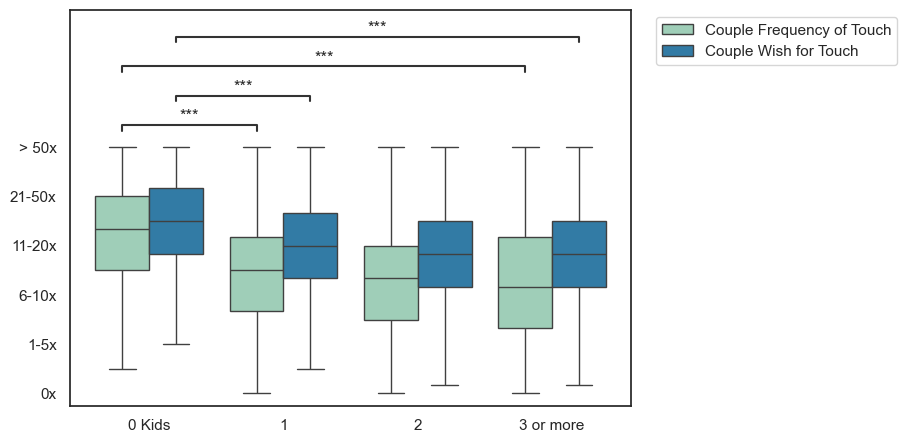

In [24]:
df_melted = df2.melt(id_vars='Kids',
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Kids"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((0, "Couple Frequency of Touch"), (3, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (3, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (1, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (1, "Couple Wish for Touch"))
    # ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    # ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
# plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.title("Touch by Kids in the household")
# plt.savefig("output/img_bg/comparisons/kids.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [43]:
# Define the comparison pairs
pairs = [
    ((0, "Couple Frequency of Touch"), (3, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (3, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (1, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (1, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (2, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (2, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (3, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (3, "Couple Wish for Touch")),
    ((2, "Couple Frequency of Touch"), (3, "Couple Frequency of Touch")),
    ((2, "Couple Wish for Touch"), (3, "Couple Wish for Touch"))

]

# Compute effect sizes (r) for each pair
results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted['Kids'] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted['Kids'] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)
# print(effect_sizes_df)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.225e-01 U_stat=1.250e+01
6.0_Couple Frequency of Touch vs. 6.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.288e-39 U_stat=8.291e+04
10.0_Couple Frequency of Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.391e-21 U_stat=5.433e+06
0.0_Couple Frequency of Touch vs. 10.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.601e-03 U_stat=2.716e+03
0.0_Couple Wish for Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.394e-03 U_stat=3.486e+03


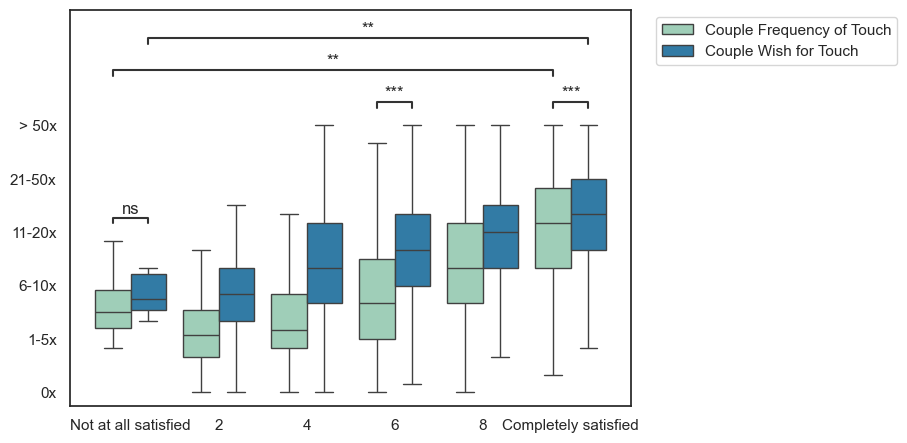

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.768e-01 U_stat=1.200e+01
6.0_Couple Frequency of Touch vs. 6.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.684e-40 U_stat=9.174e+04
10.0_Couple Frequency of Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.765e-19 U_stat=4.604e+06
0.0_Couple Frequency of Touch vs. 10.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.312e-05 U_stat=2.075e+02
0.0_Couple Wish for Touch vs. 10.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.910e-04 U_stat=1.950e+03


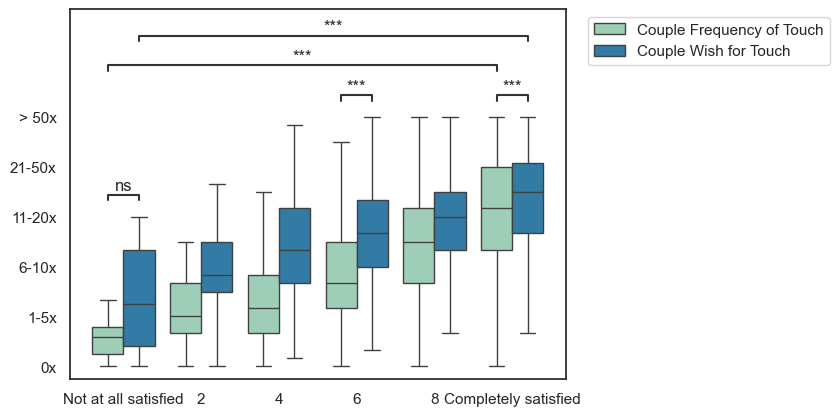

In [25]:
target1 = "Anchor Relationship Satisfaction"
target2 = "Partner Relationship Satisfaction"

df_melted = df2.melt(id_vars=target1,
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )

x = target1
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((0, "Couple Frequency of Touch"), (10, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (10, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((6, "Couple Frequency of Touch"), (6, "Couple Wish for Touch")),
    ((10, "Couple Frequency of Touch"), (10, "Couple Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.title("Touch by Relationship Satisfaction")
plt.savefig("output/img_bg/comparisons/anchor-relsat.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = target2
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
ax = sns.boxplot(data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.title("Touch by Relationship Satisfaction")
plt.savefig("output/img_bg/comparisons/partner-relsat.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [45]:
# Define the comparison pairs
pairs = [
    ((0, "Couple Frequency of Touch"), (10, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (10, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((10, "Couple Frequency of Touch"), (10, "Couple Wish for Touch")),
]

target1 = "Anchor Relationship Satisfaction"
target2 = "Partner Relationship Satisfaction"
# Compute effect sizes (r) for each pair
results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)
# print(effect_sizes_df)

# Compute effect sizes (r) for each pair
results2 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted2[(df_melted2[target2] == cat1) & (df_melted2['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted2[(df_melted2[target2] == cat2) & (df_melted2['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results2.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df2 = pd.DataFrame(results2)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.723e-10 U_stat=1.724e+04
4.0_Couple Frequency of Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.717e-05 U_stat=1.797e+05
1.0_Couple Frequency of Touch vs. 4.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.133e-41 U_stat=2.919e+04
1.0_Couple Wish for Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.648e-26 U_stat=3.870e+04


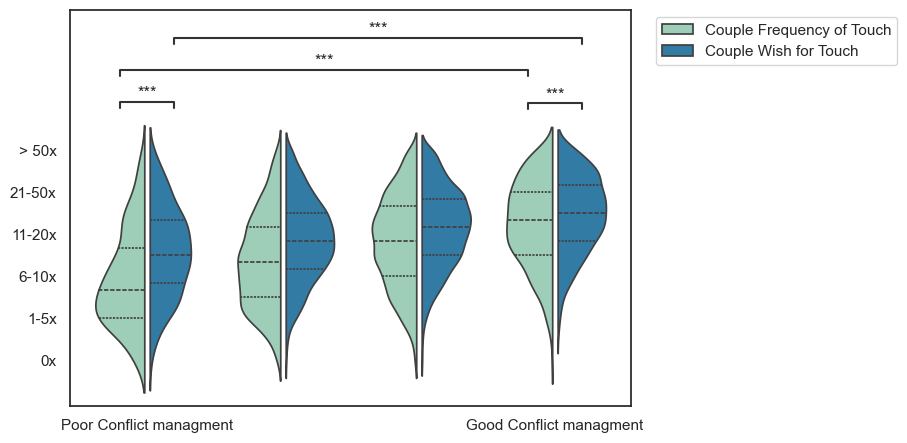

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.319e-13 U_stat=1.860e+04
4.0_Couple Frequency of Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.595e-03 U_stat=1.035e+05
1.0_Couple Frequency of Touch vs. 4.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.167e-35 U_stat=2.542e+04
1.0_Couple Wish for Touch vs. 4.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.314e-20 U_stat=3.438e+04


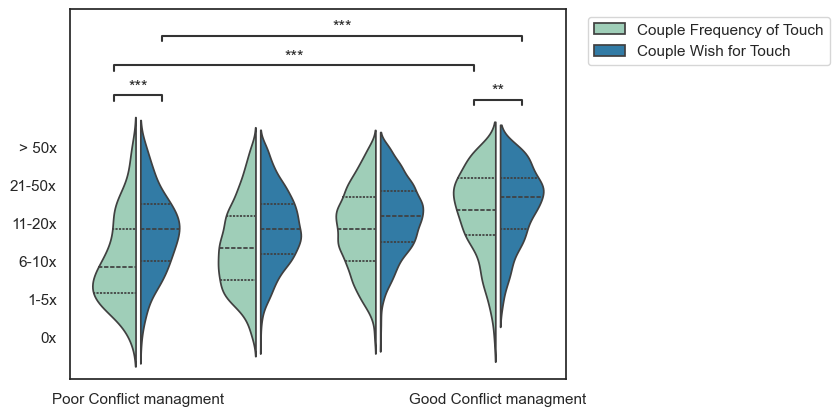

In [82]:


for i in range(0, len(df2)):
    # if 7 < df2['Anchor Conflict Management'][i] <= 12:
    #     df2.loc[i, 'Anchor conf'] = 1
    if 7 < df2['Anchor Conflict Management'][i] <= 17:
        df2.loc[i, 'Anchor conf'] = 1
    elif 17 < df2['Anchor Conflict Management'][i] <= 22:
        df2.loc[i, 'Anchor conf'] = 2
    elif 22 < df2['Anchor Conflict Management'][i] <= 27:
        df2.loc[i, 'Anchor conf'] = 3
    elif 27 < df2['Anchor Conflict Management'][i]:
        df2.loc[i, 'Anchor conf'] = 4

for i in range(0, len(df2)):
    # if 7 < df2['Partner Conflict Management'][i] <= 12:
    #     df2.loc[i, 'Partner conf'] = 1
    if 7 < df2['Partner Conflict Management'][i] <= 17:
        df2.loc[i, 'Partner conf'] = 1
    elif 17 < df2['Partner Conflict Management'][i] <= 22:
        df2.loc[i, 'Partner conf'] = 2
    elif 22 < df2['Partner Conflict Management'][i] <= 27:
        df2.loc[i, 'Partner conf'] = 3
    elif 27 < df2['Partner Conflict Management'][i]:
        df2.loc[i, 'Partner conf'] = 4

target1 = "Anchor conf"
target2 = "Partner conf"

df_melted = df2.melt(id_vars=target1,
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

df_melted2 = df2.melt(id_vars=target2,
                      value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                      var_name='Touch index', value_name='Touch Freq'
                      )

x = target1
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((1, "Couple Frequency of Touch"), (4, "Couple Frequency of Touch")),
    ((1, "Couple Wish for Touch"), (4, "Couple Wish for Touch")),
    # ((3, "Couple Frequency of Touch"), (4, "Couple Frequency of Touch")),
    # ((3, "Couple Wish for Touch"), (4, "Couple Wish for Touch")),

    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch")),
    ((4, "Couple Frequency of Touch"), (4, "Couple Wish for Touch")),
]
ax = sns.violinplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu',
                    split=True, inner="quart", gap=.1)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, plot="violinplot")

annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, ], labels=["Poor Conflict managment", "", "", "Good Conflict managment"])
# plt.title("Touch by Relationship Satisfaction")
plt.savefig("output/img_bg/comparisons/anchor-conflict.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

x = target2
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']

ax = sns.violinplot(data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu',
                    split=True, inner="quart", gap=.1)
annot = Annotator(ax, pairs, data=df_melted2, x=x, y=y, hue=hue, hue_order=hue_order, plot="violinplot")

annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test().annotate()
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, ], labels=["Poor Conflict managment", "", "", "Good Conflict managment"])
# plt.title("Touch by Relationship Satisfaction")
plt.savefig("output/img_bg/comparisons/partner-conflict.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1_Couple Frequency of Touch vs. 1_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.661e-87 U_stat=1.544e+07
0_Couple Frequency of Touch vs. 0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.224e-10 U_stat=1.286e+05
0_Couple Frequency of Touch vs. 1_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.882e-17 U_stat=2.152e+06
0_Couple Wish for Touch vs. 1_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.806e-26 U_stat=2.254e+06


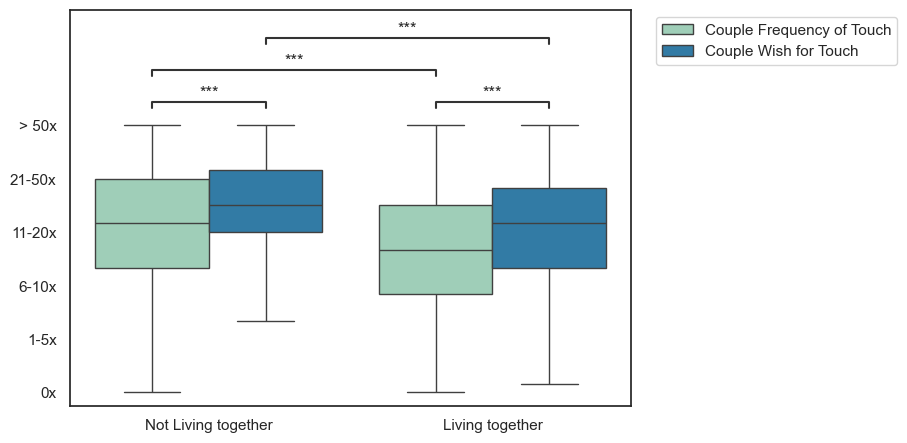

In [28]:
df_melted = df2.melt(id_vars='Cohabitation',
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Cohabitation"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((0, "Couple Frequency of Touch"), (1, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (1, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch"))
    # ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    # ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
# plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1], labels=["Not Living together", "Living together"])
# plt.title("Touch by Kids in the household")
# plt.savefig("output/img_bg/comparisons/cohabitation.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [ ]:
# Define the comparison pairs
pairs = [
    ((0, "Couple Frequency of Touch"), (1, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (1, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch"))
]

target1 = "Cohabitation"
# Compute effect sizes (r) for each pair
results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Couple Frequency of Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.705e-81 U_stat=7.354e+06
0.0_Couple Frequency of Touch vs. 0.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.312e-22 U_stat=2.438e+06
0.0_Couple Frequency of Touch vs. 1.0_Couple Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.374e-86 U_stat=6.810e+06
0.0_Couple Wish for Touch vs. 1.0_Couple Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.329e-74 U_stat=6.704e+06


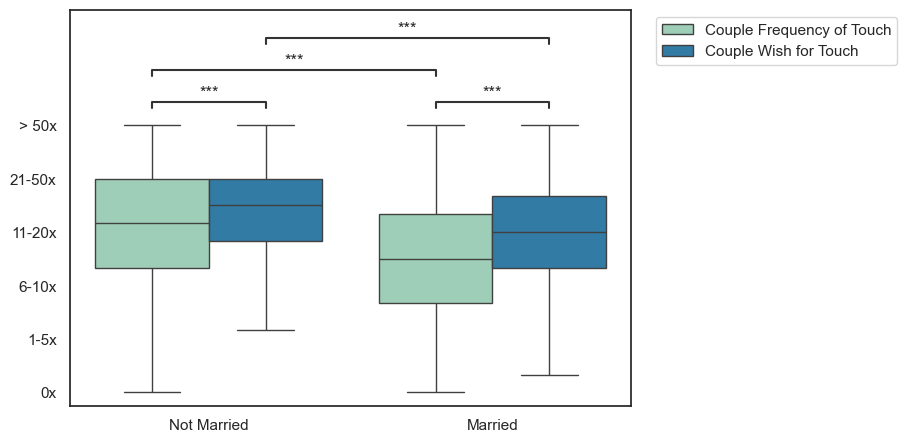

In [29]:
df_melted = df2.melt(id_vars='Married',
                     value_vars=['Couple Frequency of Touch', 'Couple Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Married"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Couple Frequency of Touch', 'Couple Wish for Touch']
pairs = [
    ((0, "Couple Frequency of Touch"), (1, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (1, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch"))
    # ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    # ((3, "Couple Frequency of Touch"), (3, "Couple Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
# plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1], labels=["Not Married", "Married"])
plt.savefig("output/img_bg/comparisons/married.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [13]:


# Define the comparison pairs
pairs = [
    ((0, "Couple Frequency of Touch"), (1, "Couple Frequency of Touch")),
    ((0, "Couple Wish for Touch"), (1, "Couple Wish for Touch")),
    ((0, "Couple Frequency of Touch"), (0, "Couple Wish for Touch")),
    ((1, "Couple Frequency of Touch"), (1, "Couple Wish for Touch"))
]

target1 = "Married"
# Compute effect sizes (r) for each pair
results1 = []
for (cat1, var1), (cat2, var2) in pairs:
    group1 = df_melted[(df_melted[target1] == cat1) & (df_melted['Touch index'] == var1)]['Touch Freq']
    group2 = df_melted[(df_melted[target1] == cat2) & (df_melted['Touch index'] == var2)]['Touch Freq']

    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
    n1, n2 = len(group1), len(group2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results1.append({
        'Comparison': f"{var1} ({cat1}) vs {var2} ({cat2})",
        'U': u_stat,
        'p-value': p_val,
        'z': z,
        'r': r
    })

effect_sizes_df1 = pd.DataFrame(results1)

In [37]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: '18-20 years',
#     2: '21-30 years',
#     3: '31-40 years',
#     4: '41-50 years',
#     5: '51+ years'
# }
#
# df2['text Relationship'] = df2['Anchor Age group'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df2.sort_values(
#     by="Anchor Age group",
#     ascending=False
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            #  labels=["My Partner\n wants a lot \nmore touch \nthan I",
#            #         "My Partner\n wants more \ntouch \nthan I",
#            #         "I want the\n same amount \nof touch \nas my partner",
#            #         "I want \nmore touch \nthan \nmy partner",
#            #         "I want a \nlot more \ntouch than \nmy partner"
#            #         ],
#            )
# # plt.savefig("output/img_bg/KDE_linear_age.png", dpi=350, transparent=False, bbox_inches='tight')
# # plt.title("Difference by Age")
# plt.show()

In [38]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: 'Not at all\n lonely',
#     2: '2',
#     3: '3',
#     4: '4',
#     5: 'Absolutely\n lonely'
# }
#
# df2['text Relationship'] = df2['Anchor Loneliness'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df2.sort_values(
#     by="Anchor Loneliness",
#     ascending=True
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2]
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner\n wants a lot \nmore touch \nthan I",
#            #         "My Partner\n wants more \ntouch \nthan I",
#            #         "I want the\n same amount \nof touch \nas my partner",
#            #         "I want \nmore touch \nthan \nmy partner",
#            #         "I want a \nlot more \ntouch than \nmy partner"
#            #         ],
#            )
# # plt.title("Discrepancy by Loneliness")
# # plt.savefig("output/img_bg/KDE_linear_loneliness.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [39]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: '0-2 years',
#     2: '3-5 years',
#     3: '6-10 years',
#     4: '11-20 years',
#     5: '21+ years'
# }
#
# df2['text Relationship'] = df2['Relationship Length'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df2.sort_values(
#     by="Relationship Length",
#     ascending=True
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner wants \na lot more\n touch than I",
#            #         "My Partner \nwants more \ntouch than I",
#            #         "I want the same \namount of touch \nas my partner",
#            #         "I want more \ntouch than \nmy partner",
#            #         "I want a lot \n more touch \nthan my partner"
#            #         ],
#            )
# # plt.title("Discrepancy by Relationship Length")
# # plt.savefig("output/img_bg/KDE_linear.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

<Figure size 1400x800 with 0 Axes>

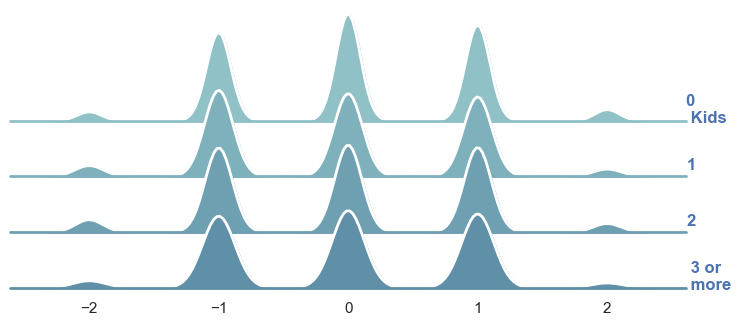

In [91]:
plt.figure(figsize=(14, 8))
duration_options = {
    0: '0 \n Kids',
    1: '1',
    2: '2',
    3: ' 3 or \n more',
}

df2['text Relationship'] = df2['Kids'].map(duration_options)

a = 'text Relationship'

kdf = df2.sort_values(
    by="Kids",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Wish Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Wish Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
# plt.title("Discrepancy by Kids in the household")
# plt.savefig("output/img_bg/KDE_linear-kids.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [41]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: 'Less positive \n communication',
#     2: '1',
#     3: '2',
#     4: '3',
#     5: "More positive \n communication"
# }
# df['text Relationship'] = df['Anchor comm'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df.sort_values(
#     by="Anchor comm",
#     ascending=False
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner wants \na lot more\n touch than I",
#            #         "My Partner \nwants more \ntouch than I",
#            #         "I want the same \namount of touch \nas my partner",
#            #         "I want more \ntouch than \nmy partner",
#            #         "I want a lot \n more touch \nthan my partner"
#            #         ],
#            )
#
# # plt.title("Discrepancy by Communication quality")
# # plt.savefig("output/img_bg/KDE_linear-com.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [42]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     0: 'Not at all\n satisfied',
#     2: '2',
#     4: '4',
#     6: '6',
#     8: '8',
#     10: 'Completely\n satisfied'
# }
# df['text Relationship'] = df['Anchor Relationship Satisfaction'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df.sort_values(
#     by="Anchor Relationship Satisfaction",
#     ascending=False
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2])
#
# # plt.title("")
# # plt.savefig("output/img_bg/KDE_linear-relsat.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [43]:
# sns.boxplot(data=df,
#             x="Relationship Length",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# # plt.savefig("output/img_bg/comparisons/Anchor-rel-len-deficit.png", dpi=350, transparent=False)

In [44]:
# sns.boxplot(data=df,
#             x="Anchor Loneliness",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img_bg/comparisons/Anchor-Loneliness.png", dpi=350, transparent=False)

In [45]:
# sns.boxplot(data=df,
#             x="Partner Loneliness",
#             y="Partner Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# #plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img_bg/comparisons/Partner-Loneliness.png", dpi=350, transparent=False)

In [46]:
# sns.boxplot(data=df,
#             x="Anchor Relationship Satisfaction",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img_bg/comparisons/Anchor-rel-sat-deficit.png", dpi=350, transparent=False)

In [47]:
 # sns.boxplot(data=df,
#             x="Kids",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.savefig("output/img_bg/comparisons/Anchor-kids-deficit.png", dpi=350, transparent=False)

In [48]:
# sns.boxplot(data=df2,
#             x="Anchor Frequency of Touch",
#             y="Anchor Loneliness",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# # plt.ylabel("Touch Deprivation")
# # plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
#
# # plt.savefig("output/img_bg/comparisons/Anchor-life-sat-deficit.png", dpi=350, transparent=False)

In [49]:
# sns.boxplot(data=df,
#             x="Anchor comm",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4],
#            labels=["Less positive \n communication", "", "", "", "More positive \n communication"])

# plt.savefig("output/img_bg/comparisons/Anchor-com-deficit.png", dpi=350, transparent=False)